In [ ]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-machine-learning-challenge-predict-the-lowest-price/predict-the-lowest-price-8-9ffabe00/9d754f08bf6711ea.zip

--2020-07-26 10:40:06--  https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-machine-learning-challenge-predict-the-lowest-price/predict-the-lowest-price-8-9ffabe00/9d754f08bf6711ea.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.129.64
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.129.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 221585 (216K) [application/zip]
Saving to: ‘9d754f08bf6711ea.zip’

9d754f08bf6711ea.zi 100%[===================>] 216.39K   464KB/s    in 0.5s    

2020-07-26 10:40:07 (464 KB/s) - ‘9d754f08bf6711ea.zip’ saved [221585/221585]



In [ ]:
!unzip 9d754f08bf6711ea.zip

Archive:  9d754f08bf6711ea.zip
   creating: Dataset/
  inflating: Dataset/sample_submission.csv  
  inflating: Dataset/Test.csv        
  inflating: Dataset/Train.csv       


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
train = pd.read_csv('Dataset/Train.csv')
test = pd.read_csv('Dataset/Test.csv')

In [ ]:
train.head(5)

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


In [ ]:
test.head(5)

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
0,IT_265079,2014-01-19,0,3,0,0,0.1,5303
1,IT_265087,2014-01-19,0,268,0,2,1.4,10492
2,IT_265107,2014-01-19,0,320,0,0,13.4,24706
3,IT_265139,2014-01-19,17,358,0,3,5.5,23464
4,IT_265142,2014-01-19,18,23,5,2,0.0,6222


In [ ]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape,train.dtypes

(Item_Id             0
 Date                0
 State_of_Country    0
 Market_Category     0
 Product_Category    0
 Grade               0
 Demand              0
 Low_Cap_Price       0
 High_Cap_Price      0
 dtype: int64, Item_Id             0
 Date                0
 State_of_Country    0
 Market_Category     0
 Product_Category    0
 Grade               0
 Demand              0
 High_Cap_Price      0
 dtype: int64, (9798, 9), (5763, 8), Item_Id              object
 Date                 object
 State_of_Country      int64
 Market_Category       int64
 Product_Category      int64
 Grade                 int64
 Demand              float64
 Low_Cap_Price         int64
 High_Cap_Price        int64
 dtype: object)

In [ ]:
k=['Date']
for i in k:
  train[i] = pd.to_datetime(train[i])
  test[i] = pd.to_datetime(test[i])
for i in k:
  test[i+'_'+'year'] = test[i].dt.year
  test[i+'_'+'day'] = test[i].dt.day
  test[i+'_'+'weekofyear'] = test[i].dt.weekofyear
  test[i+'_'+'month'] = test[i].dt.month
  test[i+'_'+'dayofweek'] =test[i].dt.dayofweek
  test[i+'_'+'weekend'] = (test[i].dt.weekday >=5).astype(int)
  train[i+'_'+'year'] = train[i].dt.year
  train[i+'_'+'day'] = train[i].dt.day
  train[i+'_'+'weekofyear'] = train[i].dt.weekofyear
  train[i+'_'+'month'] = train[i].dt.month
  train[i+'_'+'dayofweek'] = train[i].dt.dayofweek
  train[i+'_'+'weekend'] = (train[i].dt.weekday >=5).astype(int)
del train['Date']
del test['Date']

In [ ]:
df=train.append(test,ignore_index=True)

In [ ]:
#extraa
df['High_Demond']=df['High_Cap_Price']*df['Demand']
df['High_State']=df['High_Cap_Price']*df['State_of_Country']
df['High_weekofyear']=df['High_Cap_Price']/df['Date_weekofyear']
df['High_Market_Category']=df['High_Cap_Price']*df['Market_Category']
df['Ag_x']=(df['Grade']+df['Demand'])*df['High_Cap_Price']

In [ ]:
df = pd.get_dummies(df, columns=['Grade','State_of_Country','Product_Category','Market_Category','Demand'])

In [ ]:
df.tail(2)

,Item_Id,Low_Cap_Price,High_Cap_Price,Date_year,Date_day,Date_weekofyear,Date_month,Date_dayofweek,Date_weekend,High_Demond,High_State,High_weekofyear,High_Market_Category,Ag_x,Grade_0,Grade_1,Grade_2,Grade_3,State_of_Country_0,State_of_Country_1,State_of_Country_2,State_of_Country_3,State_of_Country_4,State_of_Country_5,State_of_Country_6,State_of_Country_7,State_of_Country_8,State_of_Country_9,State_of_Country_10,State_of_Country_11,State_of_Country_12,State_of_Country_13,State_of_Country_14,State_of_Country_15,State_of_Country_17,State_of_Country_18,State_of_Country_19,State_of_Country_20,State_of_Country_21,State_of_Country_22,...,Demand_5214.2,Demand_5257.8,Demand_5301.8,Demand_5321.7,Demand_5396.1,Demand_5416.6,Demand_5421.1,Demand_5436.9,Demand_5446.2,Demand_5514.3,Demand_5518.2,Demand_5575.4,Demand_5642.8,Demand_5698.0,Demand_5723.3,Demand_5765.9,Demand_5966.4,Demand_6016.1,Demand_6087.6,Demand_6100.2,Demand_6319.9,Demand_6339.5,Demand_6733.5,Demand_6965.3,Demand_7148.9,Demand_7196.4,Demand_7360.0,Demand_7540.5,Demand_8100.1,Demand_8443.4,Demand_8622.4,Demand_9252.0,Demand_13242.6,Demand_15958.7,Demand_18307.1,Demand_21862.9,Demand_24656.0,Demand_26276.4,Demand_26882.3,Demand_64160.5
15559,IT_361719,NaN,8070,2015,29,40,9,1,0,27438.0,169470,201.750,3647640,27438.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15560,IT_361723,NaN,11309,2015,29,40,9,1,0,15832.6,237489,282.725,4071240,15832.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train = df[df['Low_Cap_Price'].isnull()==False]
test = df[df['Low_Cap_Price'].isnull()==True]
del test['Low_Cap_Price']

In [ ]:
train_df=train
test_df=test

In [ ]:
indexx= test_df['Item_Id']
del train_df['Item_Id']
del test_df['Item_Id']

In [ ]:
X = train_df.drop(labels=['Low_Cap_Price'], axis=1)
y = train_df['Low_Cap_Price'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.10, random_state=101)

In [ ]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((8818, 2042), (8818,), (980, 2042), (980,))

In [ ]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.01, 
         'num_iterations': 3500,
         'num_leaves': 31,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.90,
         'bagging_freq': 2,
         'bagging_seed': 3,
         'feature_fraction': 0.90,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 1000
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', mean_squared_error(y_cv,y_pred_lgbm))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's rmse: 1103.46
[200]	valid_0's rmse: 812.898
[300]	valid_0's rmse: 735.923
[400]	valid_0's rmse: 708.791
[500]	valid_0's rmse: 695.821
[600]	valid_0's rmse: 689.806
[700]	valid_0's rmse: 688.688
[800]	valid_0's rmse: 687.566
[900]	valid_0's rmse: 688.213
[1000]	valid_0's rmse: 689.162
Early stopping, best iteration is:
[812]	valid_0's rmse: 687.368
RMSLE: 472475.44408961147


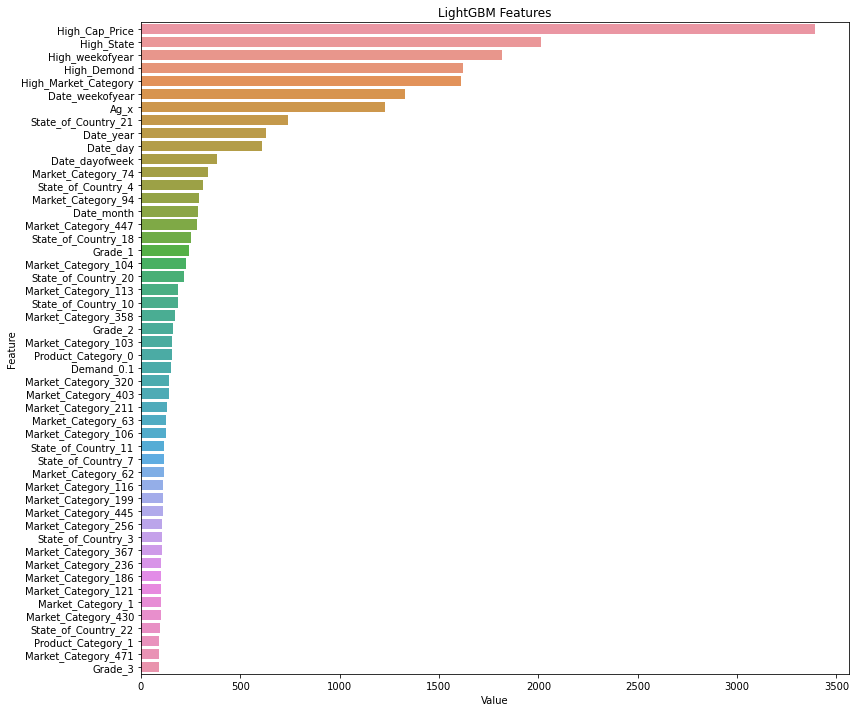

In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [ ]:
Xtest = test_df

In [ ]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(**param)
    #lgbm = LGBMRegressor(boosting='gbdt',learning_rate=0.01, n_estimators=10000, random_state=101, subsample=0.9)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", mean_squared_error(y_test, y_pred_lgbm))

    errlgb.append(mean_squared_error(y_test,y_pred_lgbm))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  579833.7637682747


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  613177.826461999


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  612740.2712847843


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  425080.8272162492


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  645018.3424018014


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  535879.2676471274


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  587684.3367254166


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  611232.2807609076


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  447710.38305012684


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  487415.13697721425


In [ ]:
np.mean(errlgb,0)

554577.2436293901

In [ ]:
lgbm_final = np.mean(y_pred_totlgb,0)
lgbm_final

array([2993.4124818 , 2626.38341704, 4448.95958531, ..., 6481.43259652,
       5911.04436024, 7875.46876316])

In [ ]:
submission = pd.DataFrame({
        "Item_Id": indexx,
        "Low_Cap_Price":lgbm_final
    })
submission.to_csv('./final_lgb.csv', index=False)
print(submission)

         Item_Id  Low_Cap_Price
9798   IT_265079    2993.412482
9799   IT_265087    2626.383417
9800   IT_265107    4448.959585
9801   IT_265139    9630.550173
9802   IT_265142    1740.087500
...          ...            ...
15556  IT_361691    7474.039836
15557  IT_361694    6491.855976
15558  IT_361699    6481.432597
15559  IT_361719    5911.044360
15560  IT_361723    7875.468763

[5763 rows x 2 columns]


In [ ]:
from google.colab import files
files.download('final_lgb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# gb

In [ ]:
X = train_df.drop(labels=['Low_Cap_Price'], axis=1)
y = train_df['Low_Cap_Price'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.10, random_state=101)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.1, n_estimators=2000, random_state=42, subsample=0.8,min_samples_split=100,min_samples_leaf=50,max_depth=8,max_features='sqrt')
gb.fit(X_train, y_train)
y_pred = gb.predict(X_cv)
print('RMSE', mean_squared_error(y_cv,y_pred))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1     4387454.0118      408955.1424           30.27s
         2     4399501.8864          -0.6388           19.28s
         3     4227714.5226      152536.8875           21.90s
         4     4156915.5670       78298.3443           23.46s
         5     3996382.5368      104686.6782           23.59s
         6     4006511.4309         -36.2552           20.84s
         7     4023169.9653       34806.7018           21.34s
         8     3984000.2415         -44.2692           19.57s
         9     3982065.3336       46423.5923           20.15s
        10     3935978.0373         -12.4827           18.93s
        20     2838049.5095       50526.9188           20.44s
        30     2488141.3209        5990.3928           19.48s
        40     2150114.2852       86054.7297           18.99s
        50     1939633.5911       14280.7002           19.51s
        60     1762299.5915         -36.2484           18.99s
       

In [ ]:
Xtest = test_df

In [ ]:

from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=4, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
             
    gb = GradientBoostingRegressor(learning_rate=0.10, n_estimators=1000, random_state=42, subsample=0.8)
    #gb = GradientBoostingRegressor(learning_rate=0.1, n_estimators=650, random_state=42, subsample=0.8)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    print('MSE', mean_squared_error(y_test, y_pred))

    errgb.append(mean_squared_error(y_test,y_pred))
    p = gb.predict(Xtest)
    y_pred_totgb.append(p)

MSE 667347.5309574982
MSE 607774.1895324124
MSE 593418.8887602927
MSE 531777.6127118494


In [ ]:
np.mean(errgb,0)

600079.5554905132

In [ ]:
gb_fib = np.mean(y_pred_totgb,0)
gb_fib

array([2814.21684238, 2829.27460559, 3843.44472037, ..., 6633.25310167,
       5878.94961853, 7402.83100312])

In [ ]:
submission = pd.DataFrame({
        "Item_Id": indexx,
        "Low_Cap_Price": abs(gb_fib)
    })
submission.to_csv('./final_gb.csv', index=False)

In [ ]:
from google.colab import files
files.download('final_gb.csv')